In [122]:
import os
import sys
# BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
BASE_DIR = os.path.dirname(os.getcwd()) # for jupyter
sys.path.append(BASE_DIR)

from datetime import datetime, timedelta
import time
import pytz
import logging
import numpy as np
import pandas as pd

import json
import jqdatasdk as jq
import pickle

import util.personal as personal
# import util.util as util
from util.util import haunter

personal.login()
LOG = haunter("trade")

cache_jqd = os.path.join(BASE_DIR, "cache", "jqd")
cache_ticker = os.path.join(BASE_DIR, "cache", "ticker")
cache_runtime = os.path.join(BASE_DIR, "cache", "runtime")
cache_history = os.path.join(BASE_DIR, "cache", "history")

file_name = "TF9999.CCFX"


1.8.1
Remains =  {'total': 2000000, 'spare': 1621280}
PCT ====>  81.06400000000001  %


In [121]:
# download data

ticker = "IF9999.CCFX"

data= jq.get_price(ticker,
                start_date=datetime(2019,1, 1,  9, 0, 0),
                #   count = 120,
                end_date=datetime(2019,9, 1,  9, 0, 0),
                fields = ['open', 'close', 'high', 'low', 'volume',
                        'money', 'avg', 'high_limit', 'low_limit',
                        'pre_close', 'paused', 'factor', 'price',
                        'open_interest'],
                frequency='minute')
with open(os.path.join(cache_history, ticker), 'wb') as f:
    pickle.dump(data, f)

In [17]:
# read

with open(os.path.join(cache_history, ticker), 'rb') as f:
    df = pickle.load(f)
df= df.dropna()
df.sort_index()
df

,open,close,high,low,volume,money,avg,high_limit,low_limit,pre_close,paused,factor,price,open_interest
2019-01-02 09:31:00,3012.4,3008.6,3013.2,3008.0,1021.0,9.223304e+08,3011.2120,3303.8,2703.4,2996.0,0.0,1.0,3011.2120,49161
2019-01-02 09:32:00,3008.6,3007.8,3009.2,3006.8,503.0,4.538752e+08,3007.8091,3303.8,2703.4,3008.6,0.0,1.0,3007.8091,48889
2019-01-02 09:33:00,3007.6,3010.2,3010.8,3007.4,363.0,3.276853e+08,3009.0479,3303.8,2703.4,3007.8,0.0,1.0,3009.0479,48727
2019-01-02 09:34:00,3010.4,3004.2,3010.8,3003.6,554.0,4.997843e+08,3007.0332,3303.8,2703.4,3010.2,0.0,1.0,3007.0332,48430
2019-01-02 09:35:00,3004.2,3003.6,3006.0,3003.2,326.0,2.938459e+08,3004.5982,3303.8,2703.4,3004.2,0.0,1.0,3004.5982,48235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31 14:56:00,4782.8,4782.0,4786.2,4781.2,994.0,1.426603e+09,4783.9825,5311.4,4345.8,4782.8,0.0,1.0,4783.9825,128766
2020-08-31 14:57:00,4781.8,4782.8,4783.6,4780.0,854.0,1.224998e+09,4781.4030,5311.4,4345.8,4782.0,0.0,1.0,4781.4030,128914
2020-08-31 14:58:00,4781.4,4781.0,4786.0,4778.2,1328.0,1.904922e+09,4781.4169,5311.4,4345.8,4782.8,0.0,1.0,4781.4169,129199
2020-08-31 14:59:00,4781.2,4784.4,4784.4,4780.4,866.0,1.242473e+09,4782.4552,5311.4,4345.8,4781.0,0.0,1.0,4782.4552,129388


In [89]:
data.index[0].date()

core_lambda = lambda row: row.name.date()
core_col = data.apply(core_lambda, axis=1)
df[["date"]] = core_col.apply(pd.Series) 
work_day = df["date"].drop_duplicates().to_list()
work_day

[datetime.date(2019, 1, 2),
 datetime.date(2019, 1, 3),
 datetime.date(2019, 1, 4),
 datetime.date(2019, 1, 7),
 datetime.date(2019, 1, 8),
 datetime.date(2019, 1, 9),
 datetime.date(2019, 1, 10),
 datetime.date(2019, 1, 11),
 datetime.date(2019, 1, 14),
 datetime.date(2019, 1, 15),
 datetime.date(2019, 1, 16),
 datetime.date(2019, 1, 17),
 datetime.date(2019, 1, 18),
 datetime.date(2019, 1, 21),
 datetime.date(2019, 1, 22),
 datetime.date(2019, 1, 23),
 datetime.date(2019, 1, 24),
 datetime.date(2019, 1, 25),
 datetime.date(2019, 1, 28),
 datetime.date(2019, 1, 29),
 datetime.date(2019, 1, 30),
 datetime.date(2019, 1, 31),
 datetime.date(2019, 2, 1),
 datetime.date(2019, 2, 11),
 datetime.date(2019, 2, 12),
 datetime.date(2019, 2, 13),
 datetime.date(2019, 2, 14),
 datetime.date(2019, 2, 15),
 datetime.date(2019, 2, 18),
 datetime.date(2019, 2, 19),
 datetime.date(2019, 2, 20),
 datetime.date(2019, 2, 21),
 datetime.date(2019, 2, 22),
 datetime.date(2019, 2, 25),
 datetime.date(2019, 

In [44]:
a = data.index[0].date()
b = df[df["date"]==a]

In [123]:
c = b["close"][[i for i in range(5,30,5)]].to_list()
s = pd.Series(c,index=['s0','s1','s2','s3','s4'],name=a)
s['open'] = b["open"][0]
s['close'] = b["close"][-1]
s['high'] = b["high"].max()
s['low'] = b["low"].min()

def candle_fun(s):
    candle_type = None
    if (s['high']-s['low'])< 0.01:
        candle_type = 0
    elif s['open']-s['low'] > (s['high']-s['low']) * 0.66:
        if s['close']-s['low'] > (s['high']-s['low']) * 0.66:
            candle_type = 1
        elif s['close']-s['low'] > (s['high']-s['low']) * 0.33:
            candle_type = 2
        else:
            candle_type = 3
    elif s['open']-s['low'] > (s['high']-s['low']) * 0.33:
        if s['close']-s['low'] > (s['high']-s['low']) * 0.66:
            candle_type = 4
        elif s['close']-s['low'] > (s['high']-s['low']) * 0.33:
            candle_type = 5
        else:
            candle_type = 6
    else:
        if s['close']-s['low'] > (s['high']-s['low']) * 0.66:
            candle_type = 7
        elif s['close']-s['low'] > (s['high']-s['low']) * 0.33:
            candle_type = 8
        else:
            candle_type = 9
    return candle_type

s['candle'] = candle_fun(s)

export_df = pd.DataFrame(columns=['s0','s1','s2','s3','s4','open','close','high','low','candle'])

export_df = export_df.append(s)
export_df['candle'] = int(export_df['candle'])

export_df

,s0,s1,s2,s3,s4,open,close,high,low,candle
2019-01-02,3003.4,2996.8,2984.4,2989.0,2975.0,3012.4,2962.2,3013.2,2949.0,3


In [124]:
timeline_df = data.copy()
core_lambda = lambda row: row.name.date()
core_col = timeline_df.apply(core_lambda, axis=1)
timeline_df[["date"]] = core_col.apply(pd.Series) 

def pre_pct(se):
    export_se = pd.Series()
    export_se["open"] = (se["open"] - se["pre_close"]) / se["pre_close"]
    export_se["close"] = (se["close"] - se["pre_close"]) / se["pre_close"]
    export_se["high"] = (se["high"] - se["pre_close"]) / se["pre_close"]
    export_se["low"] = (se["low"] - se["pre_close"]) / se["pre_close"]
    return export_se * 100
core_col = timeline_df.apply(pre_pct, axis=1)
timeline_df[["open","close","high","low"]] = core_col.apply(pd.Series) 

def candle_fun(se):
    candle_type = None
    if (se['high']-se['low'])< 1:
        candle_type = 0
    elif se['open']-se['low'] > (se['high']-se['low']) * 0.66:
        if se['close']-se['low'] > (se['high']-se['low']) * 0.66:
            candle_type = 1
        elif se['close']-se['low'] > (se['high']-se['low']) * 0.33:
            candle_type = 2
        else:
            candle_type = 3
    elif se['open']-se['low'] > (se['high']-se['low']) * 0.33:
        if se['close']-se['low'] > (se['high']-se['low']) * 0.66:
            candle_type = 4
        elif se['close']-se['low'] > (se['high']-se['low']) * 0.33:
            candle_type = 5
        else:
            candle_type = 6
    else:
        if se['close']-se['low'] > (se['high']-se['low']) * 0.66:
            candle_type = 7
        elif se['close']-se['low'] > (se['high']-se['low']) * 0.33:
            candle_type = 8
        else:
            candle_type = 9
    return candle_type

work_day = timeline_df["date"].drop_duplicates().to_list()
candle_df = pd.DataFrame(columns=['s0','s1','s2','s3','s4','open','close','high','low','candle'])
for item_day in work_day:
    item_df = timeline_df[timeline_df["date"]==item_day]
    s_list = item_df["close"][[i for i in range(5,30,5)]].to_list()
    s_se = pd.Series(s_list,index=['s0','s1','s2','s3','s4'],name=item_day)
    s_se['open']  = item_df["open"][0]
    s_se['close'] = item_df["close"][-1]
    s_se['high']  = item_df["high"].max()
    s_se['low']   = item_df["low"].min()
    s_se['candle'] = candle_fun(s_se)
    candle_df = candle_df.append(s_se)
candle_df['candle'] = candle_df['candle'].astype(int)
    



In [127]:
candle_df

,s0,s1,s2,s3,s4,open,close,high,low,candle
2019-01-02,-0.006659,-0.093346,-0.193967,-0.053501,0.000000,0.547397,0.074324,0.574099,-0.314992,0
2019-01-03,-0.026969,-0.155374,0.006752,0.026855,0.087202,-0.121531,0.040521,0.341160,-0.283382,0
2019-01-04,0.556309,-0.080944,0.033766,-0.006736,-0.013454,-0.486060,0.039471,0.603799,-0.573820,8
2019-01-07,-0.039236,-0.065703,-0.039492,0.039481,0.026356,0.315644,-0.052480,0.447162,-0.267921,0
2019-01-08,0.059106,0.013154,0.013141,-0.065742,0.013148,-0.006563,0.013114,0.223552,-0.210153,0
...,...,...,...,...,...,...,...,...,...,...
2019-08-26,-0.132549,0.090171,-0.069031,-0.015902,0.074385,-1.308735,-0.058442,0.217877,-1.382319,7
2019-08-27,0.174299,0.010548,0.047406,0.036720,-0.083932,0.473127,-0.089314,0.600712,-0.230234,0
2019-08-28,0.125938,-0.021001,-0.062962,-0.042008,-0.021026,0.247147,-0.036877,0.294473,-0.194645,0
2019-08-29,-0.100079,0.021138,-0.026469,-0.084728,-0.026484,0.089592,-0.015861,0.158453,-0.232202,0


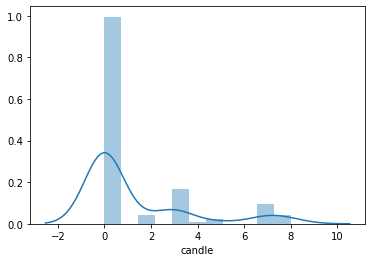

In [126]:

import seaborn as sns
import matplotlib.pyplot as plt

 
p1=sns.distplot(candle_df['candle'] )
plt.show()